# Linear Regression workshop
## Fifa 19 Players
Data source: https://www.kaggle.com/karangadiya/fifa19/

## Imports

In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Data preparation

### Data sourcing

In [23]:
df = pd.read_csv('./datasets/fifa19_data.csv')
df.shape

(18207, 89)

In [18]:
df.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


### Data exploration

In [8]:
# data profiling
profile = pandas_profiling.ProfileReport(df)
display(profile)

Number of variables,89
Number of observations,18207
Total Missing (%),4.7%
Total size in memory,12.4 MiB
Average record size in memory,712.0 B
Numeric,35
Categorical,44
Boolean,0
Date,0
Text (Unique),1
Rejected,9


### Data modification

In [9]:
# let's only keep useful features
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [24]:
# we drop colmns we're not interesting in, including Height and Weight as we assume the Overall ability of a player
# is not dependent on Height and Weight
# axis=1 to drop columns (axis=0 to drop rows)
df = df.drop(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'], axis=1)
df.shape

(18207, 35)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 35 columns):
Overall            18207 non-null int64
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength           18159 non-null float64
LongShots          18159 non-null float64
Aggression 

In [26]:
# we noticed that there are more Overall than all other attributes, this is because for weak players Fifa
# didn't bother give them attributes, so let's ony keep top players then
df = df.loc[df.Overall>62]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13065 entries, 0 to 13064
Data columns (total 35 columns):
Overall            13065 non-null int64
Crossing           13065 non-null float64
Finishing          13065 non-null float64
HeadingAccuracy    13065 non-null float64
ShortPassing       13065 non-null float64
Volleys            13065 non-null float64
Dribbling          13065 non-null float64
Curve              13065 non-null float64
FKAccuracy         13065 non-null float64
LongPassing        13065 non-null float64
BallControl        13065 non-null float64
Acceleration       13065 non-null float64
SprintSpeed        13065 non-null float64
Agility            13065 non-null float64
Reactions          13065 non-null float64
Balance            13065 non-null float64
ShotPower          13065 non-null float64
Jumping            13065 non-null float64
Stamina            13065 non-null float64
Strength           13065 non-null float64
LongShots          13065 non-null float64
Aggression 

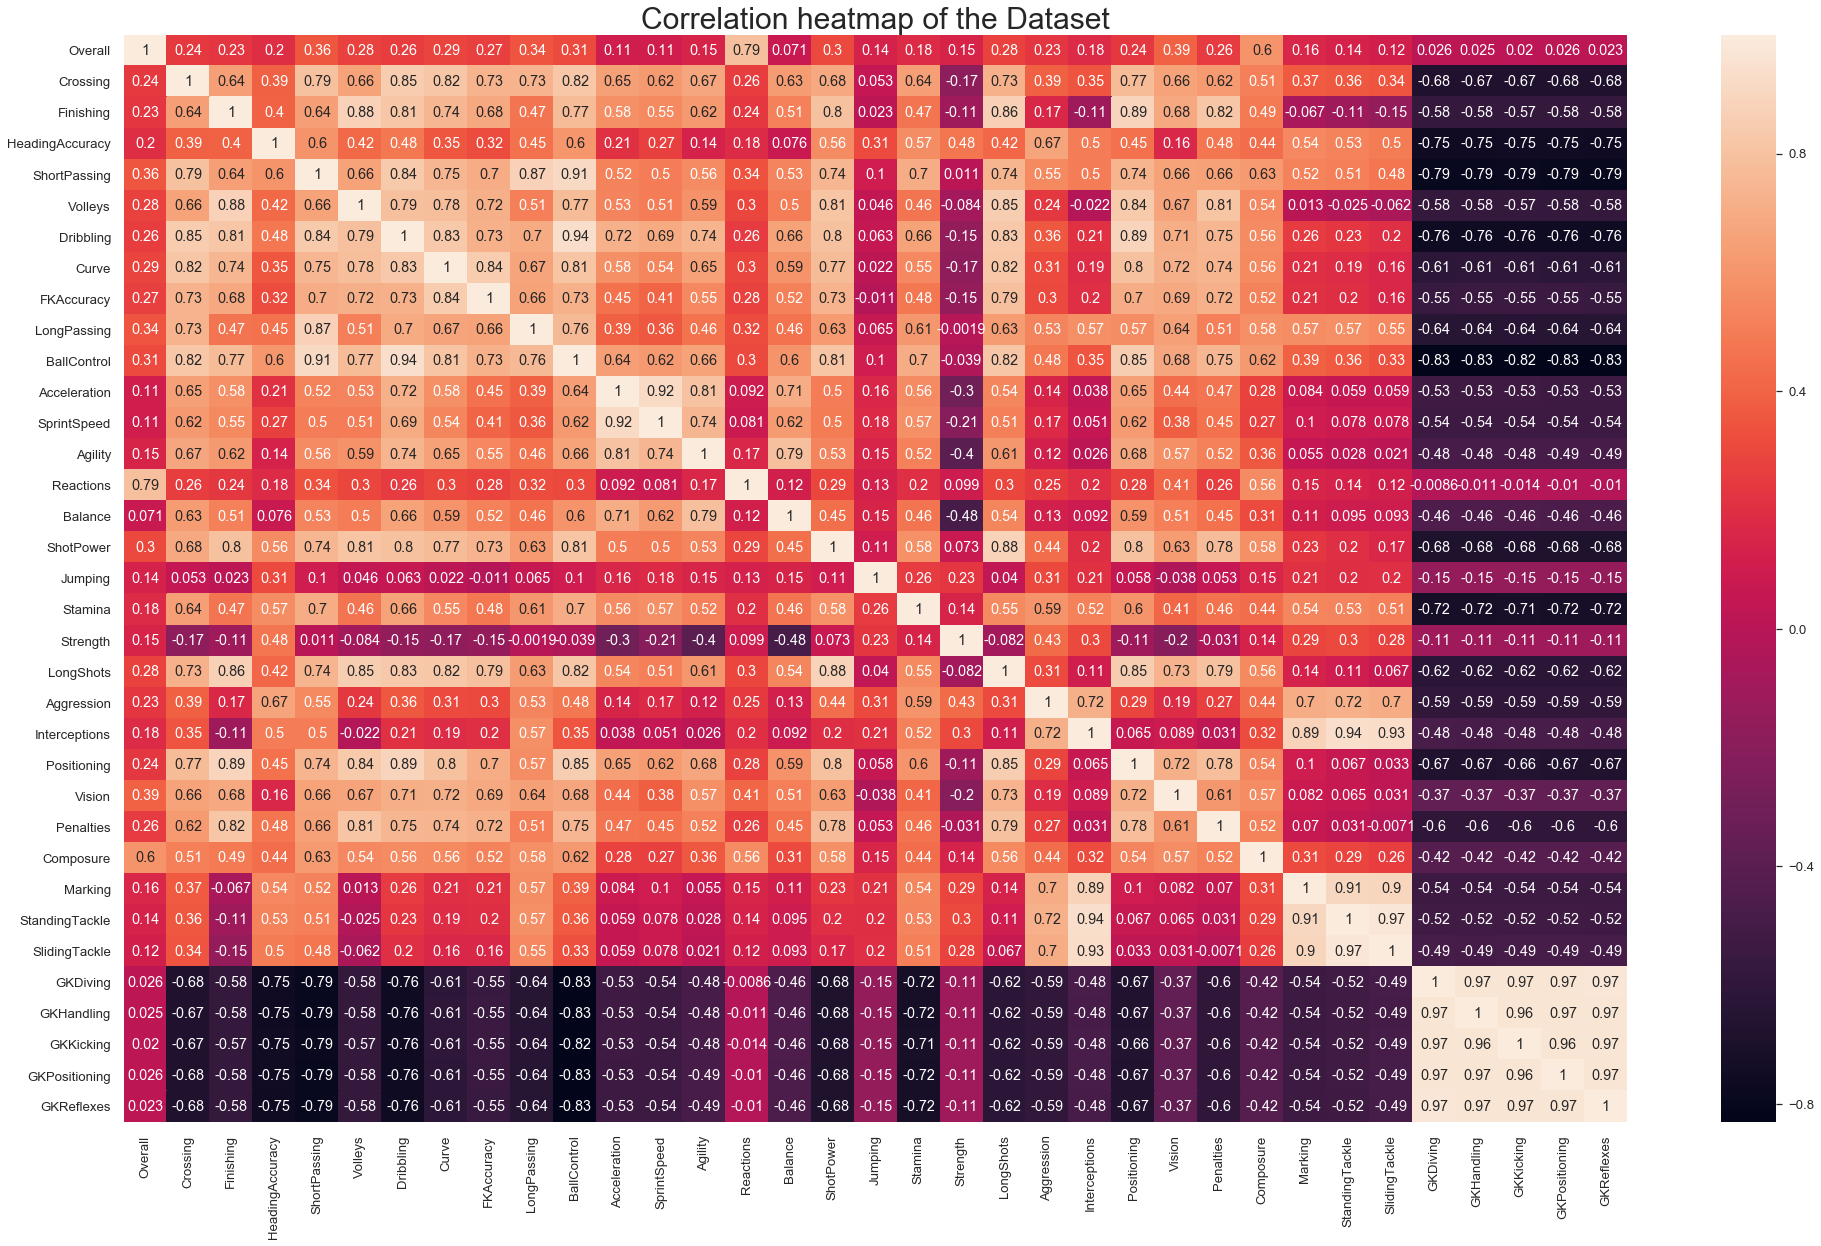

In [34]:
# plotting a correlation heatmap
plt.rcParams['figure.figsize'] = (30, 20)
sns.set(font_scale=1.2) 
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation heatmap of the Dataset', fontsize = 30)
plt.show()

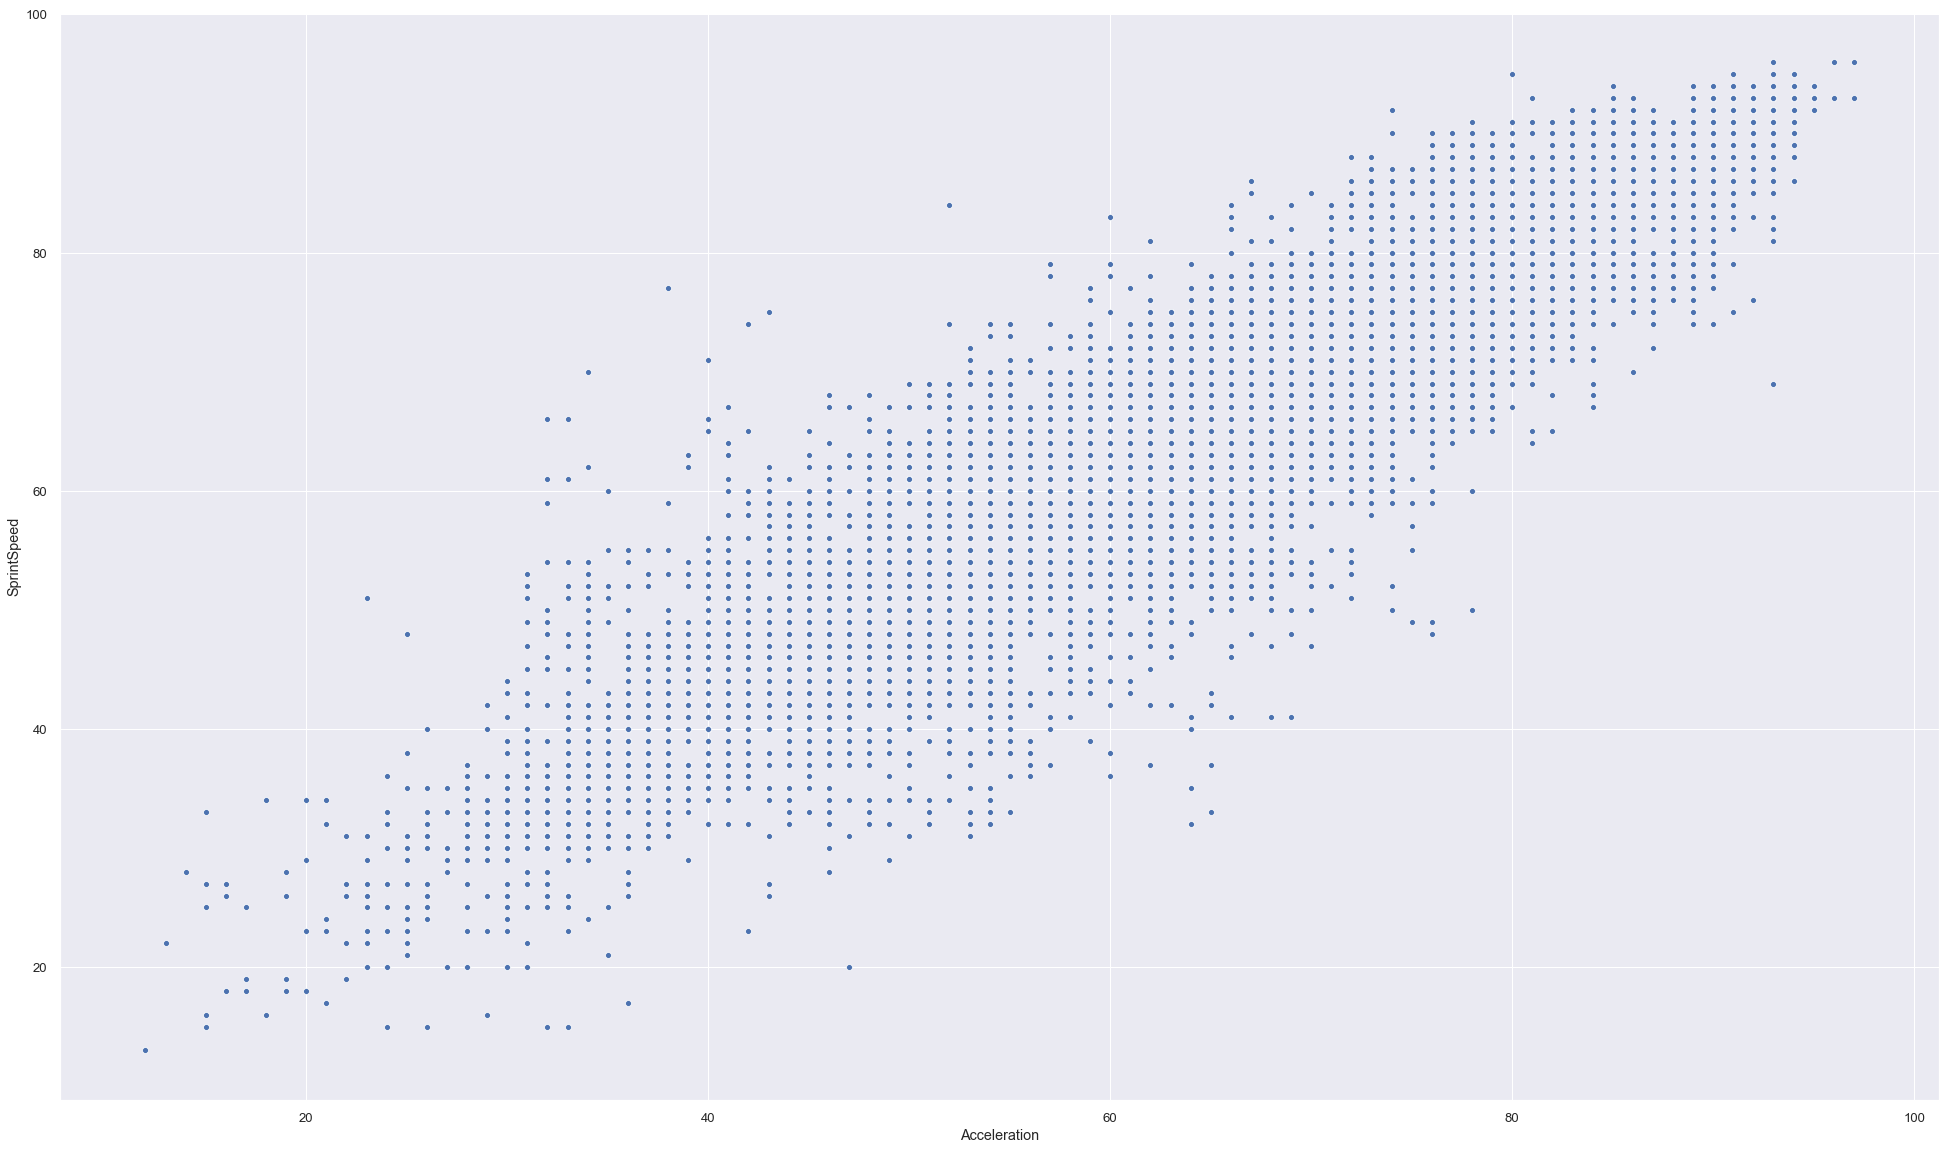

In [35]:
# let's plot Acceleration vs SprintSpeed and check if it looks indeed fairly correlated
sns.scatterplot(x='Acceleration', y='SprintSpeed', data=df)

In [49]:
print('This plot shows that the data is fairly well positively correlated, the correlation factor between those' \
     ' 2 features is indeed close to 1 : {}'.format(df.corr().loc[corr.index=='Acceleration', 'SprintSpeed'].values[0]))

This plot shows that the data is fairly well positively correlated, the correlation factor between those 2 features is indeed close to 1 : 0.9162581497630393


## Data modelization

### Train and test dataset split

In [51]:
# create train and test datasets
train_df = df.sample(frac=0.75, random_state=123)
# axis=0 to drop rows (axis=1 to drop columns)
test_df = df.drop(train_df.index, axis=0)
print('train_df: {}, test_df: {}'.format(train_df.shape, test_df.shape))

train_df: (9799, 35), test_df: (3266, 35)


In [52]:
# let's create our train and test labels vectors
# we use pop to drop Overall from train_df and test_df and isolate it in our label dataframes
train_label = train_df.pop('Overall')
test_label = test_df.pop('Overall')
print('train_label: {}, test_label: {}'.format(train_label.shape, test_label.shape))

train_label: (9799,), test_label: (3266,)


In [53]:
print('train_df: {}, test_df: {}'.format(train_df.shape, test_df.shape))

train_df: (9799, 34), test_df: (3266, 34)


### Linear regression model

In [55]:
# create the model and fit it to our train data
model = LinearRegression()
model.fit(train_df, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
# use our fitted model to make some predictions from our test data
predictions = model.predict(test_df)
print('Mean squared error (MSE): {:.3f}'.format(mean_squared_error(predictions, test_label)))

Mean squared error (MSE): 5.330


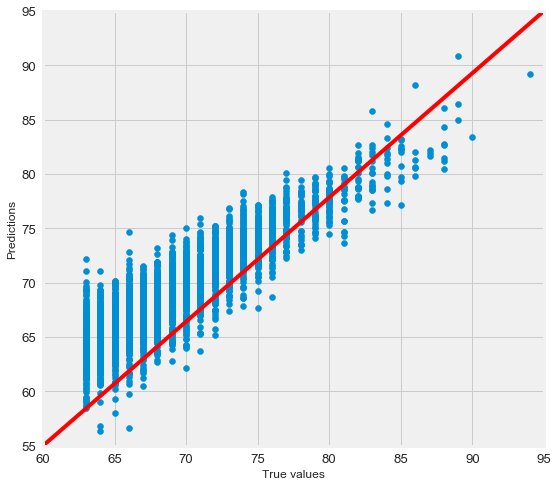

In [65]:
# let's plot our predictions
plt.figure(figsize=(8, 8))
plt.scatter(test_label, predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.xlim(60, 95)
plt.ylim(55, 95)
plt.plot([60, 95], [55, 95], color='red')

(array([   5.,   32.,  157.,  442.,  942., 1001.,  523.,  145.,   16.,
           3.]),
 array([-9.37131847, -7.51277533, -5.65423219, -3.79568905, -1.93714591,
        -0.07860277,  1.77994037,  3.63848351,  5.49702665,  7.35556979,
         9.21411293]),
 <a list of 10 Patch objects>)

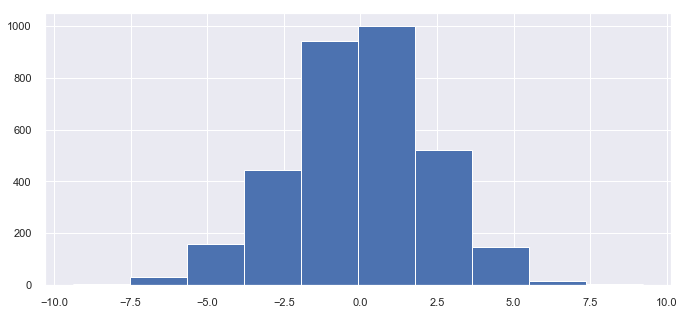

In [83]:
# let's plot the distribution of our prediction error
sns.set()
error = predictions - test_label
plt.figure(figsize=(10, 5))
plt.hist(error)

In [94]:
# measure of how well our model would evaluate, here our model reproduce pretty well about 77% of the inputs
# but not so well the other 23%
model.score(train_df, train_label)

0.7729034438597938

In [105]:
print('Mean squared error (MSE): {:.3f}\n' \
      'Mean absolute error: {:.3f}\n' \
      'R2 error: {:.3f}'.format(mean_squared_error(predictions, test_label),
                mean_absolute_error(predictions, test_label),
                r2_score(predictions, test_label)))

Mean squared error (MSE): 5.330
Mean absolute error: 1.810
R2 error: 0.728


In [108]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

In [111]:
print('Root-mean squared error (RMSE): {:.3f} = {:.3f}'.format(rmse(predictions, test_label), np.sqrt(mean_squared_error(predictions, test_label))))

Root-mean squared error (RMSE): 2.309 = 2.309


## Fancy player attributes visualization

In [76]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)
    
# defining a polar graph
def graphPolar(data, id = 0):
    if 0 <= id < len(data.ID):
        details(row = data.index[id], 
                title = data['Name'][id], 
                age = data['Age'][id], 
                photo = data['Photo'][id],
                nationality = data['Nationality'][id],
                image = data['Flag'][id], 
                logo = data['Club Logo'][id], 
                club = data['Club'][id])
    else:
        print('The base has {} players. You can put positive numbers from 0 to {}'.format(data.shape[0], data.shape[0]))

In [79]:
data = pd.read_csv('./datasets/fifa19_data.csv')

# filling the missing value for the continous variables for proper data visualization
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

data.fillna(0, inplace = True)

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

# renaming a column
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


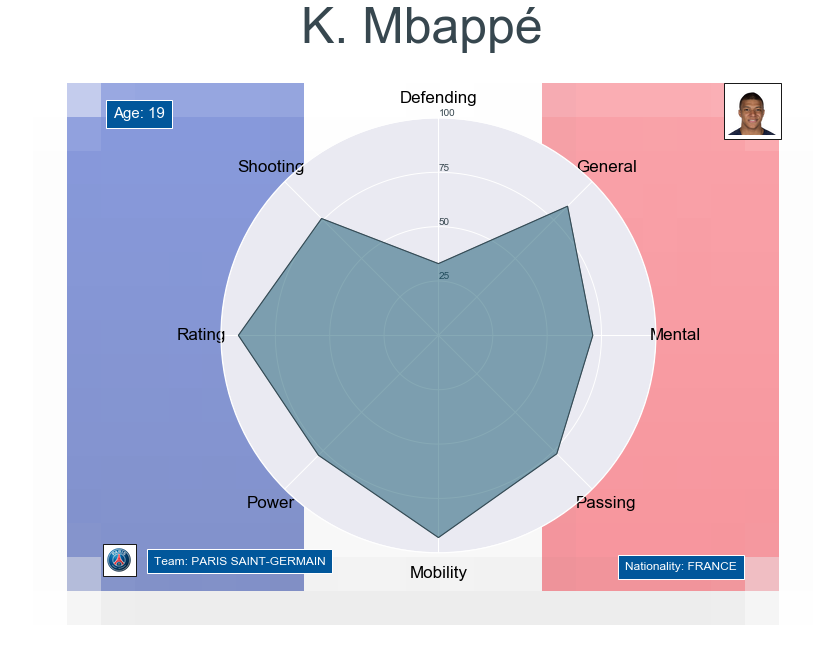

In [96]:
players_name = 'Mbappé' 
graphPolar(raw_df, id=data.loc[data.Name.str.contains(players_name)].index[0])

In [95]:
data.loc[data.Name.str.contains('Mbappé')]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
25,25,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,...,6.0,€166.1M,33,84,71,77,93,78,92,76
